In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from scipy import stats
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import sys
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [2]:
train = pd.read_csv('./clean_dataset/Cleaned train.csv')
train.head()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Saleprice
0,1,18.144573,13.833054,7,3.991517,2003,2003,19.433175,144.117862,0.0,...,0,0,1,0,0,0,0,1,0,208501.0
1,2,20.673625,14.117918,6,6.000033,1976,1976,54.598150,181.719186,0.0,...,0,0,1,0,0,0,0,1,0,181501.0
2,3,18.668047,14.476512,7,3.991517,2001,2002,17.768840,110.441033,0.0,...,0,0,1,0,0,0,0,1,0,223501.0
3,4,17.249651,14.106196,7,3.991517,1915,1970,54.598150,61.795315,0.0,...,0,0,1,1,0,0,0,0,0,140001.0
4,5,21.314283,15.022008,8,3.991517,2000,2000,25.404164,136.624601,0.0,...,0,0,1,0,0,0,0,1,0,250001.0


In [3]:
train.describe()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Saleprice
count,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,...,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,729.500000,18.779714,14.007220,6.093964,4.377809,1971.218107,1984.834019,40.725632,301.299193,1.116203,...,0.082305,0.002058,0.868999,0.069273,0.002743,0.008230,0.013717,0.821674,0.084362,180933.919067
std,421.032659,3.624053,1.147738,1.376369,0.758975,30.193754,20.641760,17.501338,254.299780,3.182250,...,0.274922,0.045330,0.337518,0.254005,0.052324,0.090379,0.116355,0.382919,0.278026,79495.055285
min,1.000000,8.726308,10.003398,1.000000,0.926401,1872.000000,1950.000000,0.804230,1.660007,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34901.000000
25%,365.250000,17.249651,13.582679,5.000000,3.991517,1954.000000,1967.000000,22.003135,111.088921,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,129926.000000
50%,729.500000,19.011798,14.088509,6.000000,3.991517,1972.500000,1994.000000,54.598150,162.883107,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,163001.000000
75%,1093.750000,20.673625,14.546361,7.000000,4.679501,2000.000000,2004.000000,54.598150,665.141633,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,214001.000000
max,1458.000000,47.771473,22.152569,10.000000,6.637669,2010.000000,2010.000000,54.598150,665.141633,14.266950,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,755001.000000


In [4]:
test = pd.read_csv('./clean_dataset/Cleaned test.csv')
test.head()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20.673625,14.550687,5,4.679501,1961,1961,54.598150,107.505912,7.760721,...,0,0,0,1,0,0,0,0,1,0
1,1462,20.834996,15.023149,6,4.679501,1958,1958,14.642918,174.393644,0.000000,...,0,0,0,1,0,0,0,0,1,0
2,1463,19.687482,14.950918,5,3.991517,1997,1998,54.598150,156.263694,0.000000,...,0,0,0,1,0,0,0,0,1,0
3,1464,20.348384,14.204772,6,4.679501,1998,1998,6.157403,128.653472,0.000000,...,0,0,0,1,0,0,0,0,1,0
4,1465,13.949261,12.696875,8,3.991517,1992,1992,54.598150,71.179547,0.000000,...,0,0,0,1,0,0,0,0,1,0


In [5]:
train.shape,test.shape

((1458, 380), (1459, 379))

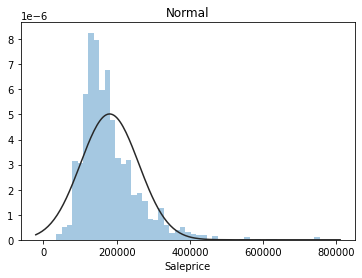

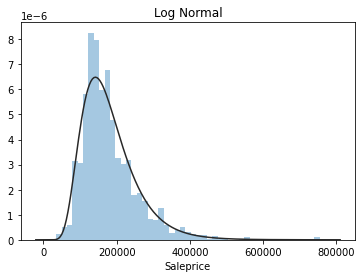

In [6]:
import scipy.stats as st
y = train['Saleprice']
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm);

## Modeling

In [7]:
y = np.log(train['Saleprice'])
X = train.drop(columns = ['Id','Saleprice'])

### 1. Random Forest Regressor

In [8]:


rand_model= RandomForestRegressor(max_depth=2, random_state=0)

rand_model.fit(X, y)

rand_pred = rand_model.predict(X)

meanSquaredError=mean_squared_error(y, rand_pred)

print("MSE:", meanSquaredError)

rootMeanSquaredError = np.sqrt(meanSquaredError)

print("RMSE:", rootMeanSquaredError)

score =rand_model.score(X, y)
print("Score", score)

MSE: 0.050486432027253565
RMSE: 0.22469186017133233
Score 0.6837893595515165


### 1.1 Grid search for random Forest

In [9]:

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [10]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune

rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model

rf_random.fit(X, y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [11]:
def evaluate(model, X, y):
    predictions = model.predict(X)
    errors = abs(predictions - y)
    mape = 100 * np.mean(errors / y)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)

best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X, y)

rand_pred = rf_random.predict(X)

meanSquaredError_ran=mean_squared_error(y, rand_pred)

print("MSE:", meanSquaredError_ran)

rootMeanSquaredError_ran = np.sqrt(meanSquaredError_ran)

print("RMSE:", rootMeanSquaredError_ran)



Model Performance
Average Error: 0.0135 degrees.
Accuracy = 99.89%.
MSE: 0.000488808453559525
RMSE: 0.022109012948558444


### 2. Elastic Net

In [12]:

els_model = ElasticNet(random_state=0)

els_model.fit(X, y)

els_pred = els_model.predict(X)

meanSquaredError=mean_squared_error(y, els_pred)

print("MSE:", meanSquaredError)

rootMeanSquaredError = np.sqrt(meanSquaredError)

print("RMSE:", rootMeanSquaredError)

score =els_model.score(X, y)
print("Score", score)

MSE: 0.030395072593938893
RMSE: 0.17434182686303046
Score 0.8096271614872839


## 2.1 Optimization Elastic net

In [13]:

kf = KFold(n_splits=12, shuffle=True, random_state=42)

def cv_rmse(model):
    
    return np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=kf)).mean()

elastic_net = ElasticNet()

print("RMSE with default parameters :",cv_rmse(elastic_net))

RMSE with default parameters : 0.17519749831464346


In [14]:


# Lets tune Parameters

alpha = [0.001,0.005,0.01,0.05,0.1,0.5,1,5,10,50,100]
l1_ratio = [0.001,0.005,0.01,0.05,0.1,0.5,1,5,10,50,100]

params = {"alpha":alpha,"l1_ratio":l1_ratio}

# Apply GridSearchCV to get optimal Parameters

grid_cv = GridSearchCV(estimator=elastic_net,
                       param_grid=params,
                       cv=kf,
                       refit=True,
                       verbose=1)
grid_cv.fit(X,y)                     

Fitting 12 folds for each of 121 candidates, totalling 1452 fits


GridSearchCV(cv=KFold(n_splits=12, random_state=42, shuffle=True),
             estimator=ElasticNet(),
             param_grid={'alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10,
                                   50, 100],
                         'l1_ratio': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5,
                                      10, 50, 100]},
             verbose=1)

In [15]:
grid_cv.best_score_, grid_cv.best_params_

(0.9253241732844129, {'alpha': 0.001, 'l1_ratio': 0.5})

In [16]:
# Redefining model with above parameter values

elastic_net = ElasticNet(alpha=0.001, l1_ratio=0.5).fit(X,y)

cv_rmse(elastic_net)

els_pred = elastic_net.predict(X)

meanSquaredError_els=mean_squared_error(y, els_pred)

print("MSE:", meanSquaredError_els)

rootMeanSquaredError_els = np.sqrt(meanSquaredError_els)

print("RMSE:", rootMeanSquaredError_els)

score =els_model.score(X, y)
print("Score", score)




MSE: 0.009478359356967855
RMSE: 0.09735686599807872
Score 0.8096271614872839


### 3. Ridge regression

In [17]:


reg = linear_model.Ridge(alpha=.5)

reg.fit(X,y)

reg_pred = reg.predict(X)


meanSquaredError_rg = mean_squared_error(y, reg_pred)

print("MSE:", meanSquaredError_rg)

rootMeanSquaredError_rg = np.sqrt(meanSquaredError_rg)

print("RMSE:", rootMeanSquaredError_rg)

score =reg.score(X, y)
print("Score", score)

MSE: 0.007492235691236377
RMSE: 0.08655770151313155
Score 0.9530740329394254


### 4. Lasso 

In [18]:

lass_model = linear_model.Lasso(alpha=0.1)

lass_model.fit(X,y)

lass_pred = lass_model.predict(X)

meanSquaredError_las=mean_squared_error(y, lass_pred)

print("MSE:", meanSquaredError_las)

rootMeanSquaredError_las = np.sqrt(meanSquaredError_las)

print("RMSE:", rootMeanSquaredError_las)

score =lass_model.score(X, y)
print("Score", score)

MSE: 0.028450891934249763
RMSE: 0.16867392191518452
Score 0.8218041085770681


### 5. Linear Regression

In [19]:

lr = LinearRegression(normalize = True)

lr.fit(X,y)

modelPred = lr.predict(X)

meanSquaredError_lr = mean_squared_error(y, modelPred)

print("MSE:", meanSquaredError_lr)

rootMeanSquaredError_lr = np.sqrt(meanSquaredError_lr)

print("RMSE:", rootMeanSquaredError_lr)

score =lr.score(X, y)
print("Score", score)

MSE: 0.008985976478363272
RMSE: 0.09479439054270708
Score 0.9437183167203342


In [20]:
new_test = test.copy()
new_test.drop(columns = ['Id'],inplace = True)

### Which model had the best RMSE?

In [21]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Lasso', 'Ridge regression', 
              'Random forest', 'Elastic Net', 
                ],
    'MSE': [
        meanSquaredError_lr, 
        meanSquaredError_las,  
        meanSquaredError_rg, 
        meanSquaredError_ran, 
        meanSquaredError_els,
        
       
    ],
    'RMSE':[
        rootMeanSquaredError_lr, 
        rootMeanSquaredError_las,  
        rootMeanSquaredError_rg, 
        rootMeanSquaredError_ran, 
        rootMeanSquaredError_els,
        
    ]})

models.sort_values(by='RMSE', ascending=False)

,Model,MSE,RMSE
1,Lasso,0.028451,0.168674
4,Elastic Net,0.009478,0.097357
0,Linear Regression,0.008986,0.094794
2,Ridge regression,0.007492,0.086558
3,Random forest,0.000489,0.022109


### 1. Predict test _ set with Random model 

In [22]:
predictions = rf_random.predict(new_test)
pred_random = np.exp(predictions)
pred_random[0:10]

array([124515.6824601 , 150727.98392946, 181522.87036274, 185207.88880639,
       188506.28039246, 184451.29287167, 172778.85950429, 174957.3690883 ,
       178831.94456135, 124898.90191019])

In [23]:
# Create a submisison dataframe and append the relevant columns
submission_random = pd.DataFrame()

submission_random['Id'] = test['Id']

submission_random['SalePrice'] = pred_random # our model predictions on the test dataset

submission_random.head()

,Id,SalePrice
0,1461,124515.682460
1,1462,150727.983929
2,1463,181522.870363
3,1464,185207.888806
4,1465,188506.280392


In [24]:
# Convert submisison dataframe to csv for submission to csv 
submission_random.to_csv('./submission_random.csv',index=False)

In [25]:
submission_random.describe()

,Id,SalePrice
count,1459.000000,1459.000000
mean,2190.000000,176596.678968
std,421.321334,71112.154337
min,1461.000000,59229.131879
25%,1825.500000,128911.212610
50%,2190.000000,155847.917658
75%,2554.500000,207252.128782
max,2919.000000,550161.057977


### 2. Predict test _ set with Elastic Net

In [26]:
predictions = elastic_net.predict(new_test)
pred_els= np.exp(predictions)
pred_els[0:10]

array([120939.47061486, 155534.92665671, 183215.69331522, 200303.84707366,
       195178.80789119, 172153.61778416, 182845.09641905, 161251.62624374,
       197316.59632215, 116912.06598827])

In [27]:
# Create a submisison dataframe and append the relevant columns
submission_els = pd.DataFrame()

submission_els['Id'] = test['Id']

submission_els['SalePrice'] = pred_els # our model predictions on the test dataset

submission_els.head()

,Id,SalePrice
0,1461,120939.470615
1,1462,155534.926657
2,1463,183215.693315
3,1464,200303.847074
4,1465,195178.807891


In [28]:
# Convert submisison dataframe to csv for submission to csv 
submission_els.to_csv('./submission_els.csv',index=False)

In [29]:
submission_els.describe()

,Id,SalePrice
count,1459.000000,1.459000e+03
mean,2190.000000,1.788618e+05
std,421.321334,8.022180e+04
min,1461.000000,4.163066e+04
25%,1825.500000,1.260586e+05
50%,2190.000000,1.580024e+05
75%,2554.500000,2.114212e+05
max,2919.000000,1.044982e+06
